## 7-8 Putting it all together with a multi class classification problem
* Binary classification have 2 options
* Multiclass classification have more then 2 options

### Data preperation

Imports

In [1]:
import torch as pt
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import helper_functions

Getting the data, then to tensors

In [2]:
# Set the hyperparamaters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create data
X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# To tensors
X_blob = pt.from_numpy(X_blob).type(pt.float)
y_blob = pt.from_numpy(y_blob).type(pt.float)

# Split to train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)



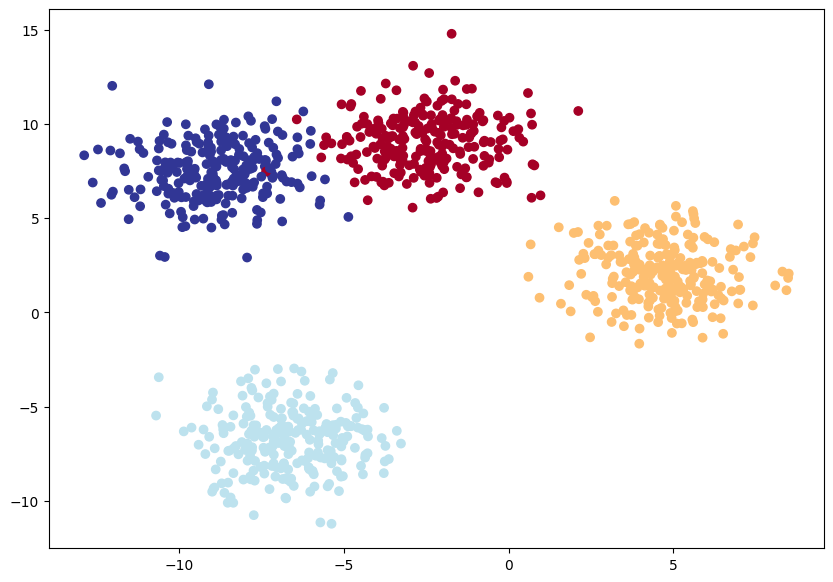

In [3]:
# Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)
plt.show()

### Build model

In [4]:
device = "cuda" if pt.cuda.is_available() else "cpu"

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
# Create an instance of the model
model_4 = BlobModel(input_features=2, output_features=4).to(device)
print(model_4) # 2 pg av 2 dimensioner av blobbar, 4 för 4 st klasser

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)


In [5]:
# Create a loss function
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = pt.optim.SGD(params=model_4.parameters(), lr=0.1)

In [12]:
# Getting prediction probabilities for a multi class PyTorch model
# Raw outputs
model_4.eval()
with pt.inference_mode():
    y_test_logits = model_4(X_blob_test.to(device))
    y_pred_probs = pt.softmax(y_test_logits, dim=1)
    print(y_pred_probs[:10])
    print(pt.sum(y_pred_probs[0])) # sum av vald row blir 1

    print(pt.argmax(y_pred_probs[0]).item()) # för att finna den klassen som är mest sannolik att det är

tensor([[0.1655, 0.2610, 0.2778, 0.2957],
        [0.3524, 0.2475, 0.1950, 0.2050],
        [0.1381, 0.4259, 0.3570, 0.0790],
        [0.2143, 0.2799, 0.2545, 0.2513],
        [0.1373, 0.2387, 0.3039, 0.3200],
        [0.3624, 0.2504, 0.1919, 0.1954],
        [0.1319, 0.4171, 0.3821, 0.0689],
        [0.1869, 0.2474, 0.2742, 0.2915],
        [0.1372, 0.4443, 0.3350, 0.0834],
        [0.1697, 0.2449, 0.2840, 0.3014]])
tensor(1.)
tensor(3)
